IMPORT LIBARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px

IMPORTING DATASET

In [2]:
df = pd.read_csv(r'C:\Users\nicks\OneDrive\Documents\financial_loan.csv', encoding='latin1')

In [3]:
df.head()

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,2/11/2021,9/13/2021,4/13/2021,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,1/1/2021,12/14/2021,1/15/2021,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,1/5/2021,12/12/2021,1/9/2021,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,2/25/2021,12/12/2021,3/12/2021,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,1/1/2021,12/14/2021,1/15/2021,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835


### metadata of data

In [4]:
print("No of rows: ", df.shape[0])

No of rows:  38576


In [5]:
print("No of columns: ", df.shape[1])

No of columns:  24


In [7]:
df.dtypes

id                         int64
address_state             object
application_type          object
emp_length                object
emp_title                 object
grade                     object
home_ownership            object
issue_date                object
last_credit_pull_date     object
last_payment_date         object
loan_status               object
next_payment_date         object
member_id                  int64
purpose                   object
sub_grade                 object
term                      object
verification_status       object
annual_income            float64
dti                      float64
installment              float64
int_rate                 float64
loan_amount                int64
total_acc                  int64
total_payment              int64
dtype: object

In [8]:
# convert 'issue date' column to date data type
df['issue_date'] = pd.to_datetime(df['issue_date'])

In [9]:
df.dtypes

id                                int64
address_state                    object
application_type                 object
emp_length                       object
emp_title                        object
grade                            object
home_ownership                   object
issue_date               datetime64[ns]
last_credit_pull_date            object
last_payment_date                object
loan_status                      object
next_payment_date                object
member_id                         int64
purpose                          object
sub_grade                        object
term                             object
verification_status              object
annual_income                   float64
dti                             float64
installment                     float64
int_rate                        float64
loan_amount                       int64
total_acc                         int64
total_payment                     int64
dtype: object

In [10]:
df.describe()

,id,member_id,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
count,3.857600e+04,3.857600e+04,3.857600e+04,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000
mean,6.810371e+05,8.476515e+05,6.964454e+04,0.133274,326.862965,0.120488,11296.066855,22.132544,12263.348533
std,2.113246e+05,2.668105e+05,6.429368e+04,0.066662,209.092000,0.037164,7460.746022,11.392282,9051.104777
min,5.473400e+04,7.069900e+04,4.000000e+03,0.000000,15.690000,0.054200,500.000000,2.000000,34.000000
25%,5.135170e+05,6.629788e+05,4.150000e+04,0.082100,168.450000,0.093200,5500.000000,14.000000,5633.000000
50%,6.627280e+05,8.473565e+05,6.000000e+04,0.134200,283.045000,0.118600,10000.000000,20.000000,10042.000000
75%,8.365060e+05,1.045652e+06,8.320050e+04,0.185900,434.442500,0.145900,15000.000000,29.000000,16658.000000
max,1.077501e+06,1.314167e+06,6.000000e+06,0.299900,1305.190000,0.245900,35000.000000,90.000000,58564.000000


### Total Loan Applications

In [11]:
total_loan_application = df['id'].count()
print("Total Loan Applications:", total_loan_application)

Total Loan Applications: 38576


### MTD Total Loan Applications

In [12]:
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

mtd_data = df[(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]

mtd_loan_applications = mtd_data['id'].count()

print(f"MTD Loan Applications(for {latest_issue_date.strftime('%B %Y')}):{mtd_loan_applications}")

MTD Loan Applications(for December 2021):4314


### Total Funded Amount

In [13]:
total_funded_amount = df['loan_amount'].sum()
total_funded_amount_millions = total_funded_amount / 1000000

# f"" (f-string): A modern, readable way to embed expressions inside string literals.
# ':' introduces a new format specifier
# .2f: Formats the number as a floating-point (f) with exactly two decimal places (.2).
# M: Appended literally to represent millions, as per your example.

print(f"Total Funded Amount: ${total_funded_amount_millions:.2f}M")

Total Funded Amount: $435.76M


### MTD - Total Funded Amount

In [44]:
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

mtd_data = df[(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]

# f"" (f-string): A modern, readable way to embed expressions inside string literals.
# ':' introduces a new format specifier
# .2f: Formats the number as a floating-point (f) with exactly two decimal places (.2).
# M: Appended literally to represent millions, as per your example.

mtd_total_funded_amount = mtd_data['loan_amount'].sum()
mtd_total_funded_amount_millions = mtd_total_funded_amount/1000000

print("MTD Total Funded Amount", mtd_total_funded_amount_millions)

MTD Total Funded Amount 53.981425


### Total Amount Received

In [15]:
total_amount_received = df['total_payment'].sum()
total_amount_received_millions = total_funded_amount / 1000000
print(f"Total Amount Received: ${total_amount_received_millions:.2f}M")

Total Amount Received: $435.76M


### MTD Total Amount Received

In [16]:
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

mtd_data = df[(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]

mtd_total_amount_received = mtd_data['total_payment'].sum()
mtd_total_amount_received_millions = mtd_total_amount_received/1000000

# f"" (f-string): A modern, readable way to embed expressions inside string literals.
# ':' introduces a new format specifier
# .2f: Formats the number as a floating-point (f) with exactly two decimal places (.2).
# M: Appended literally to represent millions, as per your example.

print(f"MTD Total Amount Received: ${mtd_total_amount_received_millions:.2f}M")

MTD Total Amount Received: $58.07M


### Average Interest Rate

In [17]:
avg_int_rate = df['int_rate'].mean() * 100
print("Average interst rate:{:.2f}%".format(avg_int_rate))

Average interst rate:12.05%


### Average Debt-to-Income Ration(DTI)

In [18]:
avg_dti = df['dti'].mean() * 100
print("Average DTI:{:.2f}%".format(avg_dti))

Average DTI:13.33%


### Good Loan Metrics

In [19]:
good_loans = df[df['loan_status'].isin(["Fully Paid", "Current"])]

total_loan_applications = df['id'].count()

good_loan_applications = good_loans['id'].count()
good_loan_funded_amount = good_loans['loan_amount'].sum()
good_loan_received = good_loans['total_payment'].sum()

good_loan_funded_amount_millions = good_loan_funded_amount / 1_000_000
good_loan_received_millions = good_loan_received / 1_000_000

good_loan_percentage = (good_loan_applications / total_loan_applications) * 100

print("Good Loan Applications:", good_loan_applications)
print("Good Loan Funded Amount (in Millions): ${:.2f}M".format(good_loan_funded_amount_millions))
print("Good Loan Total Received (in Millions): ${:.2f}M".format(good_loan_received_millions))
print("Percent of Good Loan Applications: {:.2f}%".format(good_loan_percentage))

Good Loan Applications: 33243
Good Loan Funded Amount (in Millions): $370.22M
Good Loan Total Received (in Millions): $435.79M
Percent of Good Loan Applications: 86.18%


### Bad Loan Metrics

In [20]:
bad_loans = df[df['loan_status'].isin(["Charged Off"])]

total_loan_applications = df['id'].count()

bad_loan_applications = bad_loans['id'].count()
bad_loan_funded_amount = bad_loans['loan_amount'].sum()
bad_loan_received = bad_loans['total_payment'].sum()

bad_loan_funded_amount_millions = bad_loan_funded_amount / 1_000_000
bad_loan_received_millions = bad_loan_received / 1_000_000

bad_loan_percentage = (bad_loan_applications / total_loan_applications) * 100

print("Bad Loan Applications:", bad_loan_applications)
print("Bad Loan Funded Amount (in Millions): ${:.2f}M".format(bad_loan_funded_amount_millions))
print("Bad Loan Total Received (in Millions): ${:.2f}M".format(bad_loan_received_millions))
print("Percent of Bad Loan Applications: {:.2f}%".format(bad_loan_percentage))

Bad Loan Applications: 5333
Bad Loan Funded Amount (in Millions): $65.53M
Bad Loan Total Received (in Millions): $37.28M
Percent of Bad Loan Applications: 13.82%


### Monthly Trends by Issue Date for Total Funded Amount

##### alpha: transparancy of the color

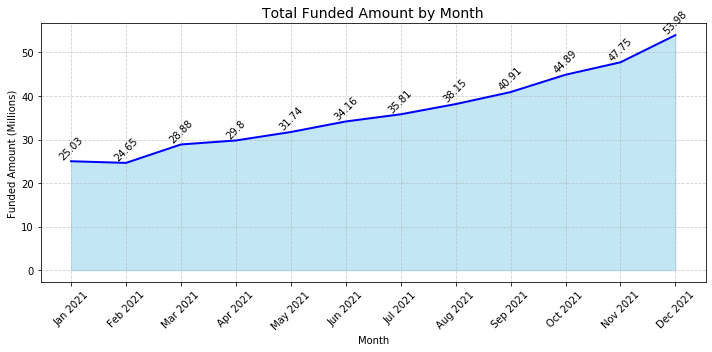

In [21]:
monthly_funded = (
    df.sort_values('issue_date')
    .assign(month_name=lambda x: x['issue_date'].dt.strftime('%b %Y'))
    .groupby('month_name', sort=False)['loan_amount']
    .sum()
    .div(1_000_000)
    .reset_index(name='loan_amount_millions')                                                         
)

monthly_funded['loan_amount_millions'] = round(monthly_funded['loan_amount_millions'], 2)
            
plt.figure(figsize=(10,5))
plt.fill_between(monthly_funded['month_name'], monthly_funded['loan_amount_millions'], color='skyblue', alpha=0.5)
plt.plot(monthly_funded['month_name'], monthly_funded['loan_amount_millions'], color='blue', linewidth=2)
    
# Add data labels
for i, value in enumerate(monthly_funded['loan_amount_millions']):
    plt.text(i, value, str(value), ha='center', va='bottom', fontsize=10, rotation=45, color='black')
    
    
plt.title('Total Funded Amount by Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Funded Amount (Millions)')
plt.xticks(ticks=range(len(monthly_funded)), labels=monthly_funded['month_name'], rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Monthly Trends is Issue Data for Total Amount Received

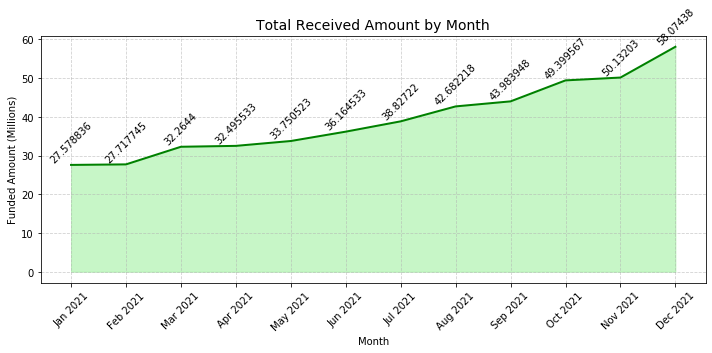

In [22]:
monthly_received = (
    df.sort_values('issue_date')
    .assign(month_name=lambda x: x['issue_date'].dt.strftime('%b %Y'))
    .groupby('month_name', sort=False)['total_payment']
    .sum()
    .div(1_000_000)
    .reset_index(name='received_amount_millions')                                                         
)

plt.figure(figsize=(10,5))
plt.fill_between(monthly_funded['month_name'], monthly_received['received_amount_millions'], color='lightgreen', alpha=0.5)
plt.plot(monthly_received['month_name'], monthly_received['received_amount_millions'], color='green', linewidth=2)

# Add data labels
for i, value in enumerate(monthly_received['received_amount_millions']):
    plt.text(i, value, str(value), ha='center', va='bottom', fontsize=10, rotation=45, color='black')
    
plt.title('Total Received Amount by Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Funded Amount (Millions)')
plt.xticks(ticks=range(len(monthly_received)), labels=monthly_received['month_name'], rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Monthly Trends is Issue Data for Total Loan Applications

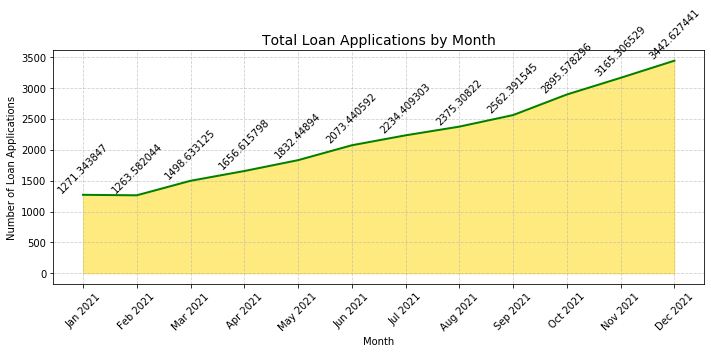

In [23]:
monthly_received = (
    df.sort_values('issue_date')
    .assign(month_name=lambda x: x['issue_date'].dt.strftime('%b %Y'))
    .groupby('month_name', sort=False)['id']
    .sum()
    .div(1_000_000)
    .reset_index(name='loan_applications_count')                                                         
)

plt.figure(figsize=(10,5))
plt.fill_between(monthly_funded['month_name'], monthly_received['loan_applications_count'], color='gold', alpha=0.5)
plt.plot(monthly_received['month_name'], monthly_received['loan_applications_count'], color='green', linewidth=2)

# Add data labels
for i, value in enumerate(monthly_received['loan_applications_count']):
    plt.text(i, value, str(value), ha='center', va='bottom', fontsize=10, rotation=45, color='black')
    
plt.title('Total Loan Applications by Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Number of Loan Applications')
plt.xticks(ticks=range(len(monthly_received)), labels=monthly_received['month_name'], rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Regional Analysis by State for Total Funded Amount

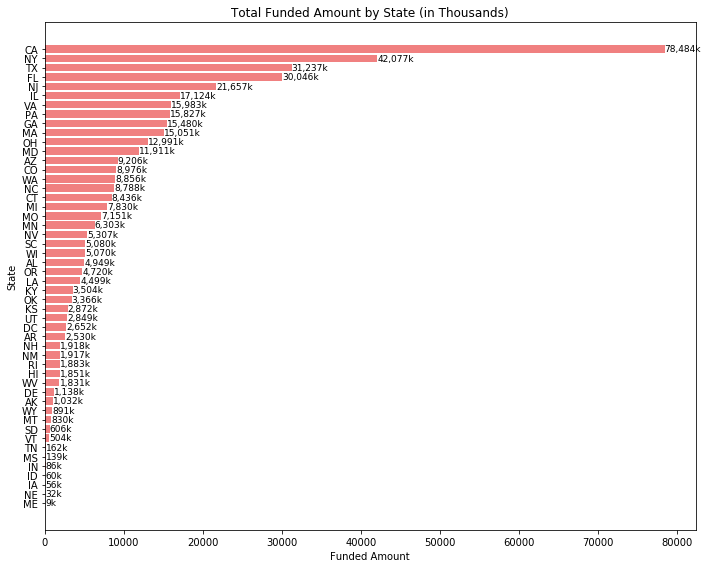

In [24]:
state_funding = df.groupby('address_state')['loan_amount'].sum().sort_values(ascending=True)
state_funding_thousands = state_funding / 1000

plt.figure(figsize=(10, 8))
bars = plt.barh(state_funding_thousands.index, state_funding_thousands.values, color='lightcoral')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 10, bar.get_y() + bar.get_height() / 2,
            f'{width:,.0f}k', va='center', fontsize=9)
    
plt.title('Total Funded Amount by State (in Thousands)')
plt.xlabel('Funded Amount')
plt.ylabel('State')
plt.tight_layout()
plt.show()

### Loan Term Analysis by Total Funded Amount

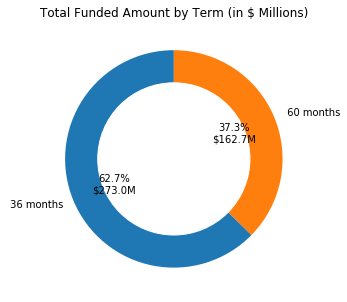

In [26]:
term_funding_millions = df.groupby('term')['loan_amount'].sum() / 1000000

plt.figure(figsize=(5,5))
plt.pie(
    term_funding_millions,
    labels=term_funding_millions.index,
    autopct=lambda p: f"{p:.1f}%\n${p*sum(term_funding_millions)/100:.1f}M",
    startangle=90,
    wedgeprops={'width': 0.4}
)
plt.gca().add_artist(plt.Circle((0, 0), 0.70, color='white'))
plt.title("Total Funded Amount by Term (in $ Millions)")
plt.show()

### Employee Length by Total Funded Amount

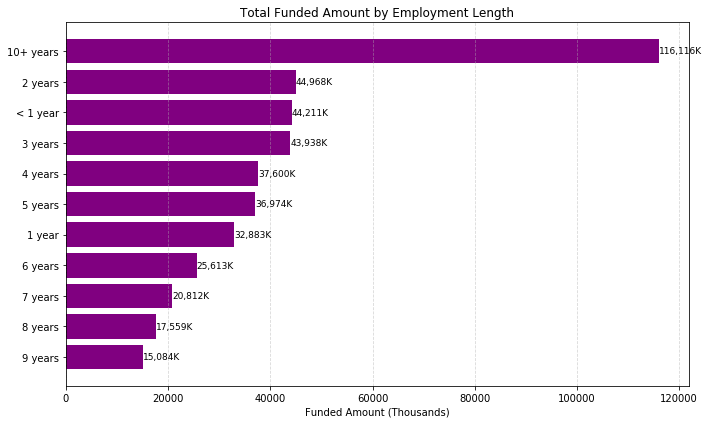

In [30]:
emp_funding_thousands = df.groupby('emp_length')['loan_amount'].sum().sort_values()/1000

plt.figure(figsize=(10, 6))
bars = plt.barh(emp_funding_thousands.index, emp_funding_thousands, color='purple')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height() / 2,
            f"{width:,.0f}K", va='center', fontsize=9)
plt.xlabel("Funded Amount (Thousands)")
plt.title("Total Funded Amount by Employment Length")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Loan Purpose by Total Funded Amount

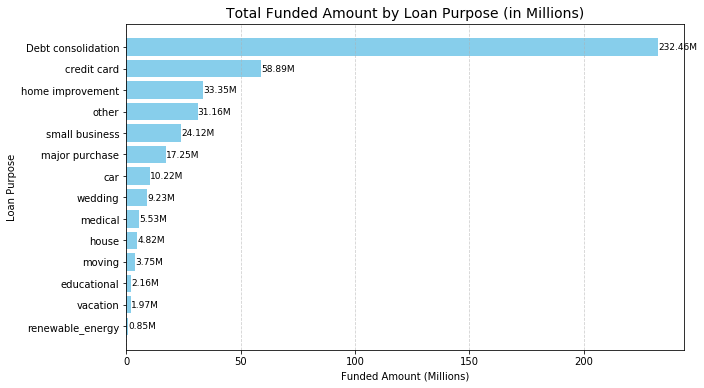

In [33]:
purpose_funding_millions = (df.groupby('purpose')['loan_amount'].sum().sort_values()/ 1000000)

plt.figure(figsize=(10, 6))
bars = plt.barh(purpose_funding_millions.index, purpose_funding_millions.values, color='skyblue')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.1, bar.get_y() + bar.get_height()/2,
            f'{width:.2f}M', va='center', fontsize=9)

plt.title('Total Funded Amount by Loan Purpose (in Millions)', fontsize=14)
plt.xlabel('Funded Amount (Millions)')
plt.ylabel('Loan Purpose')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()